* Nama : Putra Nindya Yuwana
* NIM : 2241720089
* Kelas : TI-3E / 22

# PRAKTIKUM 1

## Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

- numpy (np) library yang digunakan untuk manipulasi array dan operasi matematika.
- matplotlib.pyplot (plt) library yang digunakan untuk membuat grafik dan visualisasi data.
- scipy.stats library yang digunakan untuk analisis statistik, distribusi probabilitas, dan uji hipotesis.
- seaborn (sns) library yang digunakan untuk visualisasi data statistik dengan gaya yang lebih rapi.

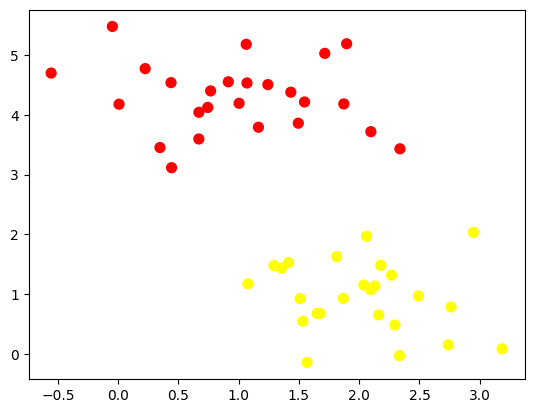

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

- make_blobs merupakan fungsi dari sklearn.datasets yang menghasilkan dataset tiruan (synthetic data). Dalam hal ini, data berbentuk kluster dari dua pusat (centers).
  - n_samples=50: Membuat 50 sampel data.
  - centers=2: Membuat 2 kluster pusat.
  - random_state=0: Menjaga hasil konsisten setiap kali dijalankan.
  - cluster_std=0.60: Mengatur seberapa menyebar titik data dari pusat kluster (semakin kecil, semakin rapat).

- plt.scatter: Membuat plot scatter (diagram sebar) dari data yang dihasilkan.
  - X[:, 0] dan X[:, 1]: Mengambil koordinat dari masing-masing titik data (x dan y).
  - c=y: Warna titik berdasarkan label kluster.
  - s=50: Ukuran titik 50.
  - cmap='autumn': Menggunakan palet warna 'autumn' untuk pewarnaan kluster.

(-1.0, 3.5)

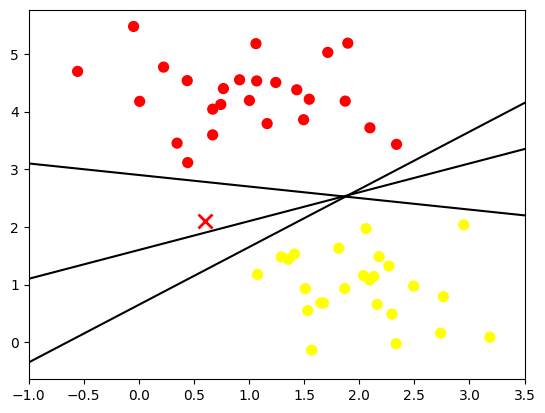

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

- xfit = np.linspace(-1, 3.5): Membuat array berisi nilai-nilai yang merata dari -1 hingga 3.5, digunakan untuk memplot garis lurus di sepanjang sumbu-x.

- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Memplot diagram sebar data yang sudah dibuat (X), dengan warna berdasarkan label kluster (y).

- plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10): Memplot tanda "x" merah besar di koordinat (0.6, 2.1).

- for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: Melakukan perulangan melalui tiga pasangan m (kemiringan) dan b (intersep) untuk menggambar tiga garis dengan rumus y = m*x + b.

- plt.plot(xfit, m * xfit + b, '-k'): Memplot garis lurus dengan kemiringan m dan intersep b menggunakan nilai xfit yang sudah dibuat, dan warna hitam ('-k').

- plt.xlim(-1, 3.5): Mengatur batas sumbu-x dari -1 hingga 3.5.

## Penerappan fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

- from sklearn.svm import SVC, yaitu kita mengimpor kelas SVC, yang merupakan algoritma SVM untuk klasifikasi.

- model = SVC(kernel='linear', C=1E10): Membuat model SVC dengan kernel linear, artinya SVM akan mencari garis pemisah linier antara dua kelas dalam data.

- C=1E10: Parameter C mengontrol seberapa besar toleransi terhadap kesalahan klasifikasi. Nilai yang sangat besar seperti 1E10 membuat model sangat ketat, meminimalkan kesalahan klasifikasi.

- model.fit(X, y): Melatih model dengan data X (fitur) dan y (label kelas) sehingga model dapat mempelajari garis pemisah antara dua klaster data.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

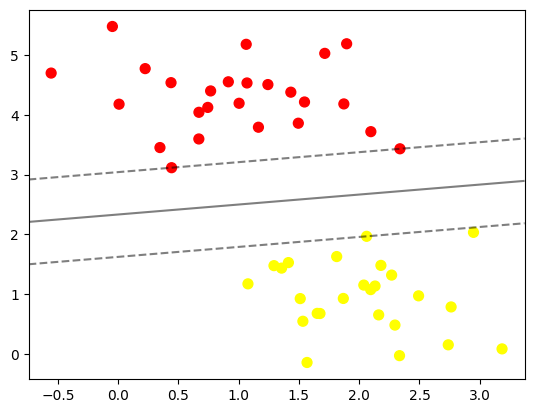

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

- ax = plt.gca(): jika tidak ada axes yang diberikan, maka fungsi akan menggunakan axes yang aktif.

- xlim dan ylim: batas sumbu-x dan sumbu-y dari plot saat ini.

- x dan y: Membuat grid 30x30 untuk mengevaluasi model pada koordinat yang merata dalam batas yang ditentukan.
- X dan Y: Membuat meshgrid untuk menghitung semua kombinasi nilai x dan y.
- xy: Meratakan grid untuk dikirim ke model sebagai input untuk evaluasi.

- P = model.decision_function(xy).reshape(X.shape): Menghitung nilai fungsi keputusan dari model SVM untuk setiap titik pada grid, dan kemudian dibentuk kembali agar sesuai dengan bentuk grid asli.

- ax.contour(...): Memplot kontur yang menunjukkan garis pemisah kelas SVM serta margin (+1 dan -1).

- Jika plot_support=True, maka support vectors (titik data paling signifikan yang digunakan untuk menentukan margin SVM) akan ditampilkan sebagai titik besar berongga.

- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Memplot scatter plot dari data fitur X dengan dua dimensi (koordinat x dan y). Warna titik akan sesuai dengan label kluster y, menggunakan warna 'autumn'. Ukuran titik diatur menjadi 50.
- plot_svc_decision_function(model): Memanggil fungsi yang telah dibuat sebelumnya untuk memvisualisasikan fungsi keputusan dari model SVM yang dilatih. Fungsi ini menambahkan garis keputusan SVM (garis tengah) dan margin (garis putus-putus) di sekitar garis tersebut.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

- model.support_vectors_, ini akan menampilkan support vectors dari model SVM yang telah dilatih.
- Output akan menampilkan array dari koordinat titik-titik yang menjadi support vectors.

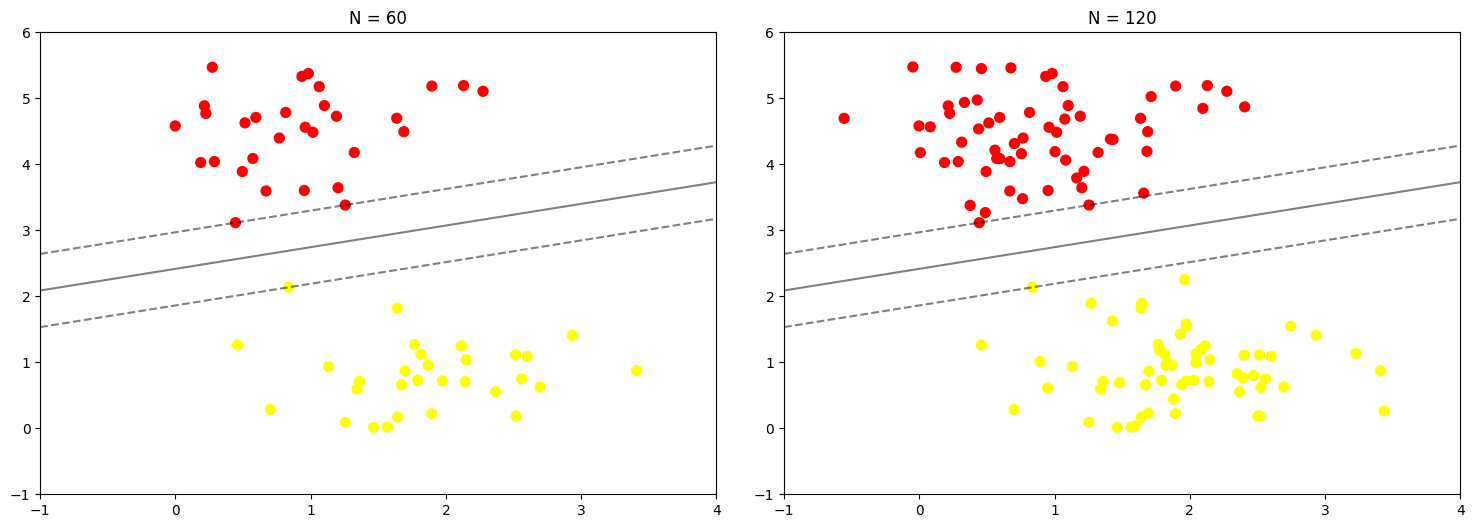

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

- plot_svm(N=10, ax=None): untuk membuat dataset dengan 200 sampel, mengambil N sampel, melatih model SVM dengan kernel linier, dan memplot data serta garis keputusan SVM pada axes yang diberikan.

- fig, ax = plt.subplots(1, 2, figsize=(16, 6)): membuat dua subplot berdampingan.

- fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1): mengatur jarak antara subplot.

- for axi, N in zip(ax, [60, 120]): memanggil plot_svm untuk dua nilai N (60 dan 120), memplot hasilnya pada subplot yang sesuai, dan memberi judul subplot dengan N yang digunakan.

## Data Tidak Terpisah Secara Linear

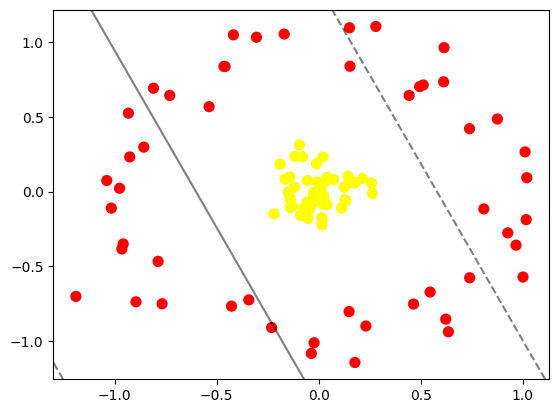

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

- make_circles(100, factor=.1, noise=.1): membuat dataset dengan 100 sampel berbentuk dua lingkaran yang saling bersilangan. factor=.1: Mengatur jarak antara dua lingkaran (lingkaran kecil di dalam lingkaran besar). noise=.1: Menambahkan sedikit noise ke data.

- clf = SVC(kernel='linear').fit(X, y): membuat model SVM dengan kernel linier dan melatihnya dengan data yang dihasilkan.

- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Memplot data dengan warna sesuai label.

- plot_svc_decision_function(clf, plot_support=False): Memplot fungsi keputusan dari model SVM dengan kernel linier

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Kode ini menghitung fitur RBF dari dataset X:
- (X ** 2).sum(1): Menjumlahkan kuadrat dari setiap fitur di setiap titik.
- np.exp(-(...)): Menghitung eksponensial dari negatif jumlah kuadrat, menghasilkan nilai fitur berbasis jarak.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.03940257,  0.39544468],
       [ 0.1164928 ,  0.05203238],
       [-0.08874936,  0.1212393 ],
       [ 0.36827198,  0.89851801],
       [ 0.03208031, -0.13428397],
       [ 0.22390137,  0.15514254],
       [ 0.03738458, -0.10060138],
       [-0.065191  , -0.07640292],
       [ 0.1335718 , -0.17485296],
       [-0.64530404,  0.52908611],
       [-0.08068472, -0.04863312],
       [ 0.08683077, -0.04799183],
       [-0.14581586,  1.04522586],
       [ 1.1070566 ,  0.49063199],
       [-0.03649716, -0.00646875],
       [-0.78572348, -0.50539495],
       [ 0.64251958,  0.77195973],
       [ 0.63852297, -0.96048246],
       [-0.21762067,  0.1736336 ],
       [ 0.99288995, -0.54721789],
       [-0.07839978, -0.01664594],
       [-0.10460406,  0.03700509],
       [-0.48591634, -0.84357719],
       [ 0.28333133, -0.00887152],
       [-0.96539997, -0.24389935],
       [ 0.04221398,  0.05230131],
       [ 0.33156349, -0.78149042],
       [-0.30087299, -0.8687507 ],
       [ 1.18771994, -0.09510098],
       [ 0.083621  , -0.0167146 ],
       [ 0.02357167, -0.11034248],
       [-0.17077836, -0.86004945],
       [ 0.13432095,  0.21811813],
       [ 0.40182277, -0.06009402],
       [ 0.19674018, -0.97872818],
       [ 0.134058  ,  0.10988615],
       [-0.41050725,  0.87477594],
       [ 0.14312475, -0.07691557],
       [ 0.1995251 ,  0.99627424],
       [-0.42924268, -0.81774564],
       [ 0.56203506,  0.85827754],
       [-0.85625225, -0.61563848],
       [-0.94169061,  0.33826555],
       [-1.18243805, -0.10206833],
       [ 0.76072975, -0.70554193],
       [-0.07493798,  0.22700286],
       [-0.16966147,  0.14650742],
       [-0.111052  , -0.14463498],
       [-0.02899865,  0.18305823],
       [ 0.11739395,  0.82678604],
       [-0.10474228, -0.01758634],
       [-0.00747353, -0.03419638],
       [ 0.99561916, -0.38904226],
       [ 0.67461331, -0.77865638],
       [ 0.91866783, -0.5055517 ],
       [ 0.05236373, -0.20206008],
       [-0.03556941, -0.06374914],
       [-0.03616944,  0.05240596],
       [ 0.24756621, -0.8832428 ],
       [-0.22836973,  0.92359772],
       [-0.54536042,  0.77563232],
       [ 0.07588605,  0.11421617],
       [-0.01046925, -0.08166561],
       [-0.02068331, -0.01492565],
       [ 1.02891024,  0.25937477],
       [-0.71779905,  0.94988265],
       [-0.01439385, -0.97402087],
       [ 0.57771182,  0.72599133],
       [-0.9399191 , -0.18133775],
       [-0.18182478, -0.14651411],
       [-0.04658906, -1.15375633],
       [-0.68121161, -0.61262927],
       [-1.04464895, -0.33589289],
       [-0.65589297, -0.46335131],
       [-0.08201103,  0.0601356 ],
       [ 0.20260427, -0.21333263],
       [-0.17971905, -0.02801331],
       [-0.39431187,  0.97349853],
       [-1.00551866,  0.40994895],
       [-0.17230401,  0.05079737],
       [ 0.28435169, -0.04146997],
       [-0.06863358, -0.16175089],
       [ 0.0839109 ,  0.169071  ],
       [ 0.00870881,  0.09660229],
       [ 0.46710536,  0.83981287],
       [ 0.7387386 ,  0.50111831],
       [-0.11724751, -0.00773141],
       [ 1.02578087, -0.1453482 ],
       [ 0.07912999,  0.14622845],
       [-0.15162621, -0.02850458],
       [ 0.07227955, -0.03943051],
       [-0.96485888,  0.17384657],
       [ 0.13602999,  0.09566199],
       [ 0.05633501,  0.13853129],
       [ 1.13968934,  0.19568787],
       [ 0.89649088, -0.46923828],
       [-0.67263241,  0.58708185],
       [-0.26716809,  0.1609893 ],
       [-0.09828061, -0.27255473],
       [-0.56656802,  0.76042215]]), y=array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0]))>

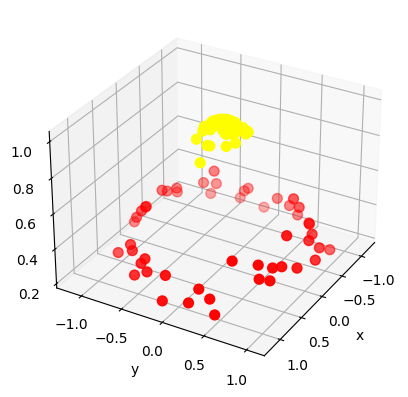

In [ ]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

- def plot_3D(elev=30, azim=30, X=X, y=y):: Mendefinisikan fungsi plot_3D untuk membuat plot 3D. elev dan azim: Mengatur sudut elevasi dan azimuth dari tampilan 3D. X dan y: Data fitur dan label.
- ax = plt.subplot(projection='3d'): Membuat subplot 3D.
- ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn'): Memplot data dalam 3D dengan X[:, 0] sebagai sumbu x, X[:, 1] sebagai sumbu y, dan r (fitur RBF) sebagai sumbu z.
- ax.view_init(elev=elev, azim=azim): Mengatur sudut pandang 3D.
- ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('r'): Menetapkan label sumbu x, y, dan z.
- interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y)): Membuat antarmuka interaktif untuk mengubah sudut elevasi dan azimuth tampilan plot 3D.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

- clf = SVC(kernel='rbf', C=1E6):
  - kernel='rbf': Menggunakan fungsi RBF untuk memisahkan data dengan batas non-linier.
  - C=1E6: Parameter besar untuk mengurangi kesalahan klasifikasi.
- clf.fit(X, y): Melatih model dengan data X dan label y.

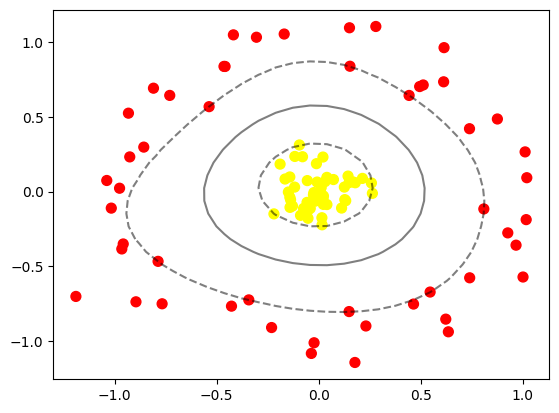

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Menampilkan plot titik data dengan warna sesuai label kelas (y).
- plot_svc_decision_function(clf): Menampilkan batas keputusan model SVC yang telah dilatih (dengan kernel RBF).
- plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none'): Menampilkan titik-titik support vectors pada plot, dengan ukuran besar dan tepi berwarna.

## Data Overlap

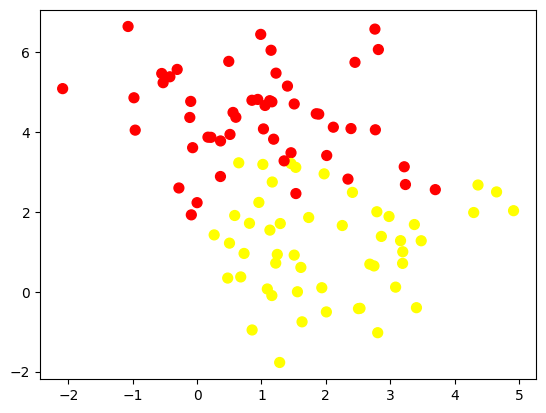

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

- X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2):
  - n_samples=100: Menghasilkan 100 titik data.
  - centers=2: Membuat dua pusat (kelompok) data.
  - random_state=0: Menetapkan nilai acak untuk reproducibility.
  - cluster_std=1.2: Mengatur deviasi standar untuk sebaran data di sekitar pusat.
- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');: Menampilkan plot sebar titik data X dengan warna berdasarkan label y menggunakan colormap autumn.

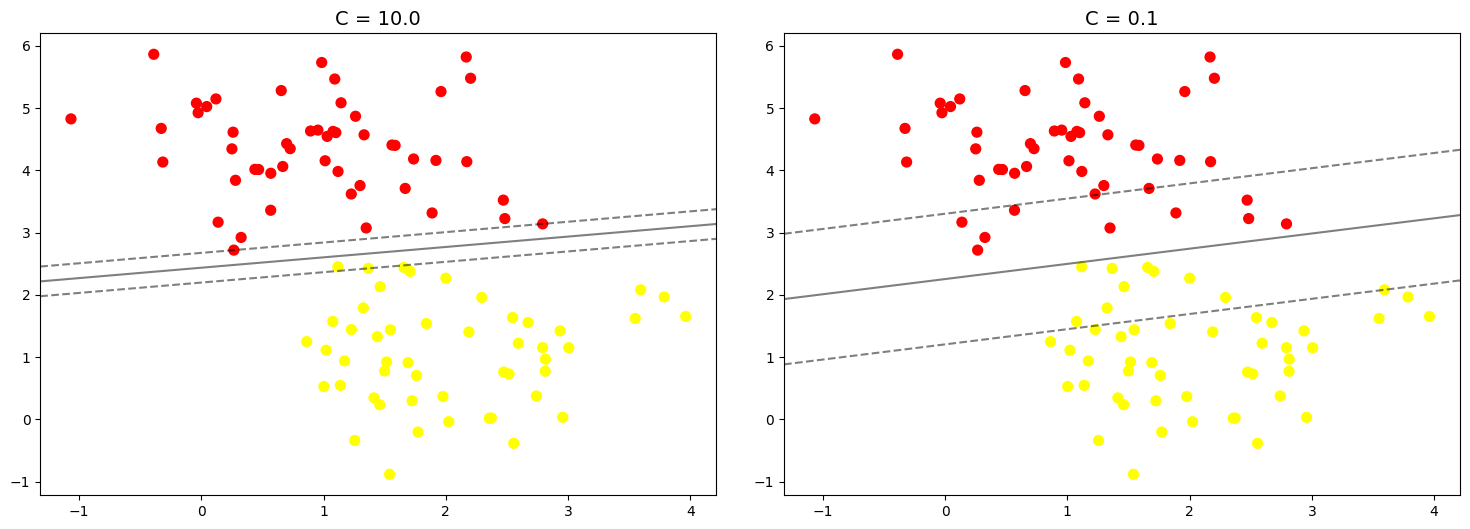

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

- X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8): Menghasilkan 100 titik data dengan dua pusat (kelompok), dengan deviasi standar 0.8.
- fig, ax = plt.subplots(1, 2, figsize=(16, 6)): Membuat dua subplot dalam satu baris untuk membandingkan hasil.
- fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1): Menyesuaikan ruang antara subplot.
- for axi, C in zip(ax, [10.0, 0.1]):: Melatih model SVC dengan dua nilai parameter C: 10.0 dan 0.1.

# PRAKTIKUM 2

## Klasifikasi SVM pada Data Citra

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


faces = fetch_lfw_people(min_faces_per_person=60): Mengambil dataset wajah dari Labeled Faces in the Wild (LFW) dengan setidaknya 60 gambar per orang.

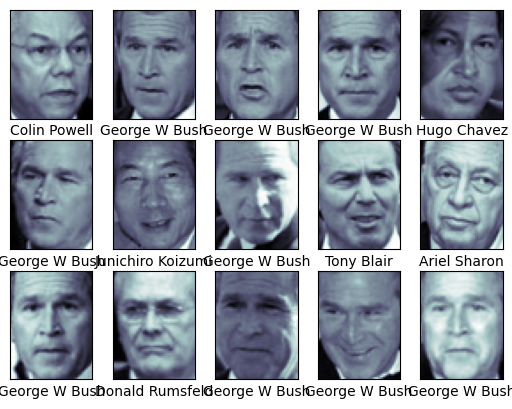

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

- fig, ax = plt.subplots(3, 5): Membuat grid subplot dengan 3 baris dan 5 kolom untuk menampilkan 15 gambar wajah.
- for i, axi in enumerate(ax.flat):: Mengiterasi melalui setiap subplot dalam grid.

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

- from sklearn.svm import SVC: Mengimpor SVC (Support Vector Classification) dari sklearn.svm.
- from sklearn.decomposition import PCA as RandomizedPCA: Mengimpor PCA (Principal Component Analysis) dan memberinya alias RandomizedPCA.
- from sklearn.pipeline import make_pipeline: Mengimpor fungsi make_pipeline untuk membuat pipeline.
- pca = RandomizedPCA(n_components=150, whiten=True, random_state=42): Membuat objek PCA dengan:
  - n_components=150: Mengurangi dimensi data ke 150 komponen utama.
  - whiten=True: Mewarnai data sehingga setiap fitur memiliki variansi satu.
  - random_state=42: Menetapkan nilai acak untuk reproducibility.
- svc = SVC(kernel='rbf', class_weight='balanced'): Membuat objek SVC dengan:
  - kernel='rbf': Menggunakan kernel Radial Basis Function.
  - class_weight='balanced': Menyeimbangkan bobot kelas untuk mengatasi ketidakseimbangan data.
- model = make_pipeline(pca, svc): Membuat pipeline yang menggabungkan PCA dan SVC.

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42):
- Membagi data menjadi data pelatihan (Xtrain, ytrain) dan data pengujian (Xtest, ytest).
  - faces.data: Fitur gambar wajah.
  - faces.target: Label nama orang.
  - random_state=42: Menetapkan nilai acak untuk memastikan pembagian yang sama setiap kali kode dijalankan.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 41s, sys: 27.8 s, total: 2min 9s
Wall time: 1min 20s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


- param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}: Menentukan grid parameter yang akan diuji untuk model SVC.
  - 'svc__C': Rentang nilai untuk parameter regularisasi C.
  - 'svc__gamma': Rentang nilai untuk parameter kernel gamma.
- grid = GridSearchCV(model, param_grid): Membuat objek GridSearchCV dengan pipeline (model) dan grid parameter (param_grid).
- %time grid.fit(Xtrain, ytrain): Melatih model dengan data pelatihan (Xtrain, ytrain) dan mengukur waktu yang dibutuhkan untuk pelatihan.
- print(grid.best_params_): Menampilkan parameter terbaik yang ditemukan selama pencarian.
- print(grid.best_score_): Menampilkan skor akurasi terbaik yang diperoleh dengan parameter terbaik.

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

model = grid.best_estimator_: Mengambil model terbaik yang ditemukan oleh GridSearchCV dari objek grid.
- yfit = model.predict(Xtest): Menggunakan model terbaik untuk memprediksi label pada data pengujian (Xtest), menghasilkan prediksi (yfit).

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

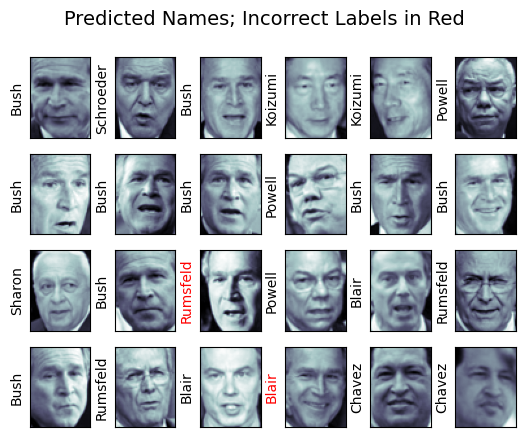

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

- fig, ax = plt.subplots(4, 6): Membuat grid subplot dengan 4 baris dan 6 kolom untuk menampilkan 24 gambar.
- for i, axi in enumerate(ax.flat):: Iterasi melalui setiap subplot untuk menampilkan gambar.
- axi.imshow(Xtest[i].reshape(62, 47), cmap='bone'): Menampilkan gambar wajah yang telah diprediksi dari data pengujian (Xtest[i]), diubah bentuknya menjadi ukuran asli (62x47 piksel) dan menggunakan colormap 'bone'.
- axi.set(xticks=[], yticks=[]): Menghapus sumbu x dan y dari subplot.
- axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red'): Menambahkan label di sebelah kiri gambar dengan nama prediksi (faces.target_names[yfit[i]]). Warna label adalah hitam jika prediksi benar dan merah jika salah.
- fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14): Menambahkan judul pada figure

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



- from sklearn.metrics import classification_report: Mengimpor fungsi classification_report untuk menghasilkan laporan evaluasi.
- print(classification_report(ytest, yfit, target_names=faces.target_names)):
  - classification_report menghasilkan laporan yang mencakup metrik evaluasi seperti precision, recall, dan F1-score untuk setiap kelas.
  - ytest adalah label sebenarnya dari data pengujian.
  - yfit adalah label yang diprediksi oleh model.
  - target_names=faces.target_names memberikan nama-nama kelas yang sesuai untuk label

Text(113.92222222222219, 0.5, 'predicted label')

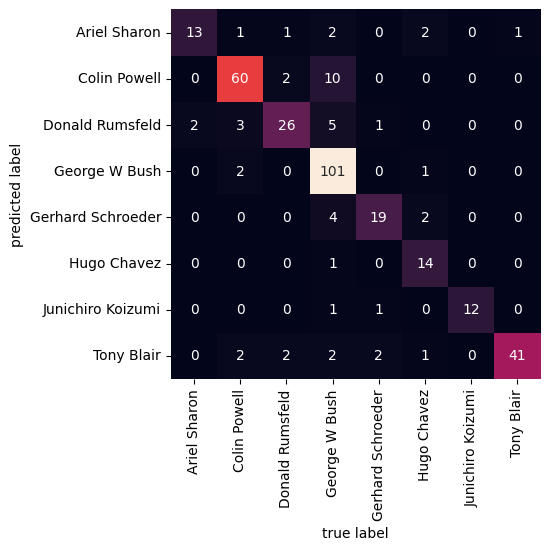

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

- from sklearn.metrics import confusion_matrix: Mengimpor fungsi confusion_matrix untuk membuat matriks confusion.
- mat = confusion_matrix(ytest, yfit): Menghitung matriks kebingungaan dari label sebenarnya (ytest) dan label yang diprediksi (yfit).
- sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names):
  - sns.heatmap dari Seaborn digunakan untuk menampilkan matriks kebingungaan sebagai heatmap.
  - mat.T mentranspos matriks kebingungaan agar label sumbu x adalah label yang benar dan sumbu y adalah label yang diprediksi.
  - square=True membuat heatmap berbentuk kotak.
  - annot=True menambahkan angka pada setiap sel di heatmap.
  - fmt='d' format angka sebagai integer.
  - cbar=False menonaktifkan colorbar.
  - xticklabels=faces.target_names dan yticklabels=faces.
  - target_names menambahkan nama-nama kelas pada sumbu x dan y.

# PRAKTIKUM 3

## Klasifikasi Naive Bayes dengan Data Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[176 171]
 [144 206]
 [187 146]
 [144  84]
 [ 71 182]
 [ 72  46]
 [ 90  41]
 [ 64 104]
 [123  59]
 [124  63]
 [131  45]
 [135  36]
 [ 88 123]
 [ 71 150]
 [169  27]
 [ 70 154]
 [154 127]
 [181  57]
 [126  28]
 [ 59 150]
 [187  77]
 [ 83 114]
 [152  54]
 [269 244]
 [204 217]
 [123 222]
 [  8 159]
 [ 42 157]
 [ 20 129]
 [161  47]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


- make_classification: Fungsi dari scikit-learn untuk membuat dataset dummy dengan fitur dan label.
  - n_samples=30: Jumlah sampel (baris) data.
  - n_features=2: Jumlah fitur (kolom) data.
  - n_classes=2: Jumlah kelas label.
  - n_informative=2: Jumlah fitur informatif.
  - n_redundant=0 dan n_repeated=0: Tidak ada fitur redundan atau diulang.
  - shuffle=False: Data tidak diacak.
- np.absolute(X): Mengubah semua nilai dalam X menjadi positif.
- np.round(X, 2) * 100: Membulatkan nilai ke 2 desimal, lalu mengalikan dengan 100 untuk menghindari koma.
- X.astype(int): Mengubah tipe data menjadi integer.

## Membuat Data Frame

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,176,171,0
1,144,206,0
2,187,146,0
3,144,84,0
4,71,182,0


- y.reshape(len(y), 1): Mengubah label y dari array 1D menjadi array 2D dengan satu kolom.
- np.concatenate((X, y_new), axis=1): Menggabungkan data fitur X dan label y_new secara horizontal (axis=1) menjadi array 2D.
- pd.DataFrame(data, columns=nama_kolom): Membuat DataFrame dari array data dan menetapkan nama kolom sesuai dengan nama_kolom.

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,176,171,Kelas B
1,144,206,Kelas B
2,187,146,Kelas B
3,144,84,Kelas B
4,71,182,Kelas B


- labels: Kamus yang memetakan angka label ke nama kelas yang lebih deskriptif.
- df.copy(): Membuat salinan dari DataFrame df untuk menghindari perubahan langsung pada DataFrame asli.
- df_label['Label'].map(labels): Menggunakan metode map untuk mengganti nilai label dengan nama kelas yang sesuai dari kamus labels.

## Visualisasi Data

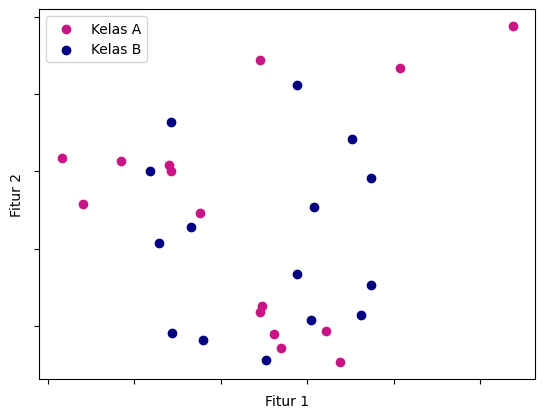

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

- colors: untuk memetakan nama kelas ke warna yang akan digunakan untuk plot.
- groupby(['Label']): Mengelompokkan DataFrame berdasarkan kolom Label.
- get_group('Kelas A') dan get_group('Kelas B'): Mengambil grup data untuk masing-masing kelas.
- plt.scatter: Membuat plot titik dengan warna yang telah ditentukan.

## Klasifikasi Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.3333333333333333


- Membuat objek dari kelas MultinomialNB untuk model Naive Bayes.
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30) : Membagi data menjadi data training dan testing dengan 30% data sebagai test data.
- mnb.fit(X_train, y_train): Melatih model Naive Bayes menggunakan data training.
- y_train_pred = mnb.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred): Membuat prediksi pada data training dan menghitung akurasi model pada data training.
- y_test_pred = mnb.predict(X_test) acc_test = accuracy_score(y_test, y_test_pred) Membuat prediksi pada data testing dan menghitung akurasi model pada data testing.

## Klasifikasi Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.4444444444444444


- gnb = GaussianNB(): Membuat objek dari kelas GaussianNB untuk model Naive Bayes Gaussian.
- gnb.fit(X_train, y_train): Melatih model Naive Bayes Gaussian menggunakan data training.
- y_train_pred_gnb = gnb.predict(X_train) acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb): Membuat prediksi pada data training dan menghitung akurasi model pada data training.
- y_test_pred_gnb = gnb.predict(X_test)
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb): Membuat prediksi pada data testing dan menghitung akurasi model pada data testing.

# PRAKTIKUM 4

## Klasifikasi Naive Bayes pada Data Multinomial

### Load Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- pd.read_csv() digunakan untuk membaca file CSV.
- encoding='latin-1' adalah pengaturan encoding karena data mungkin tidak menggunakan format UTF-8, melainkan Latin-1.

### Pra Pengolahan Data

#### Drop Kolom yang Tidak Digunakan

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- df.iloc[:, 2:] memilih semua baris (:) dan kolom dari indeks 2 hingga akhir (2:).
- drop() digunakan untuk menghapus kolom yang dipilih, dengan axis=1 menunjukkan bahwa kita bekerja dengan kolom.

#### Ubah Nama Kolom v1 (Label) dan v2 (Teks SMS)

In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


rename() digunakan untuk mengganti nama kolom sesuai dengan dictionary new_cols.

#### Inspeksi Data

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


- df['Labels'].value_counts() menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Labels'.
- df.info() memberikan informasi tentang DataFrame.
- df.describe() menghasilkan statistik deskriptif dari kolom numerik di DataFrame

#### Encode Label

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- new_labels adalah dictionary yang memetakan nilai label asli ('spam' dan 'ham') ke nilai numerik (1 dan 0)
- df['Labels'].map(new_labels) menerapkan mapping yang telah didefinisikan pada kolom 'Labels' untuk mengganti nilai string dengan nilai numerik sesuai dengan dictionary new_labels.


#### Memisahkan Fitur dengan Label

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

- X: Mengambil kolom 'SMS' dari DataFrame df, yang berisi teks pesan.
- y: Mengambil kolom 'Labels' dari DataFrame df, yang berisi label yang telah di-encode.

### Ekstraksi Fitur

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

- train_test_split: Membagi data menjadi set pelatihan dan set pengujian. test_size=0.2 berarti 20% dari data akan digunakan untuk pengujian, dan random_state=50 memastikan bahwa pembagian data konsisten setiap kali kode dijalankan.
- CountVectorizer: Mengubah teks menjadi representasi vektor hitungan kata.
fit_transform(X_train): Melatih CountVectorizer pada data pelatihan (X_train) dan mentransformasi teks menjadi matriks fitur numerik.
- transform(X_test): Mengubah data pengujian (X_test) menggunakan CountVectorizer yang telah dilatih pada data pelatihan.


In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


### Training dan Evaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


- mnb = MultinomialNB()
MultinomialNB(): Menginisiasi objek model Naive Bayes dengan distribusi multinomial.
- mnb.fit(X_train, y_train): Melatih model menggunakan data pelatihan (X_train) dan label (y_train).
- mnb.predict(X_train): Menggunakan model yang sudah dilatih untuk memprediksi label data pelatihan
- accuracy_score(y_train, y_pred_train): Menghitung akurasi model pada data pelatihan.
- mnb.predict(X_test): Menggunakan model yang sudah dilatih untuk memprediksi label data pengujian (X_test)
- accuracy_score(y_test, y_pred_test): Menghitung akurasi model pada data pengujian.

# PRAKTIKUM 5

## Klasifikasi Citra Siang dan Malam

### Langkah 0 - Import Library

In [2]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

- pathlib.Path: Mengelola dan memanipulasi jalur file secara efisien.
- matplotlib.image (mpimg): Memuat dan menangani gambar untuk visualisasi.
- matplotlib.pyplot (plt): Membuat plot dan grafik untuk visualisasi data.
- cv2: Library OpenCV untuk pemrosesan dan manipulasi gambar serta video.
- random: Menghasilkan angka acak dan melakukan operasi keacakan.
- numpy (np): Menyediakan array multidimensi dan fungsi matematis.
- pandas (pd): Memanipulasi dan menganalisis data tabular dengan DataFrame.

In [3]:
from google.colab import drive

# accesing my google drive
drive.mount('/content/drive')

Mounted at /content/drive


kita sambungkan ke drive untuk load datanya

In [4]:
# Image directories
train_dir = "/content/drive/MyDrive/ML/images/training/"
test_dir = "/content/drive/MyDrive/ML/images/test/"

- train_dir: Jalur ke direktori yang berisi gambar-gambar untuk pelatihan model ("images/training/").
- test_dir: Jalur ke direktori yang berisi gambar-gambar untuk pengujian model ("images/test/").

### Langkah 1 - Load Data dan Visualisasikan

In [5]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

- p = Path(img_dir): Membuat objek Path untuk jalur direktori gambar (img_dir).
- dirs = p.glob('*'): Mengambil semua subdirektori dan file di dalam direktori utama.
- img_list = []: Inisialisasi list kosong untuk menyimpan gambar dan label.
- for dir in dirs:: Iterasi melalui setiap subdirektori
  - label = str(dir).split('/')[-1]: Mendapatkan nama subdirektori sebagai label dari gambar
- for file in dir.glob('*.jpg'):: Iterasi melalui semua file .jpg di dalam subdirektori.
  - img = mpimg.imread(file): Membaca gambar dari file.
  - if not img is None:: Memeriksa apakah gambar berhasil dibaca
  - img_list.append((img, label)): Menambahkan tuple gambar dan label ke list img_list.
- return img_list: Mengembalikan list berisi tuple gambar dan label.

In [6]:
# Load training data
train_img = load_dataset(train_dir)

train_img = load_dataset(train_dir) akan memuat gambar-gambar dari direktori pelatihan dan mengaitkannya dengan labelnya menggunakan fungsi load_dataset

In [7]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[82, 84, 71],
         [78, 80, 67],
         [73, 75, 62],
         ...,
         [58, 59, 63],
         [65, 69, 72],
         [70, 74, 77]],
 
        [[79, 81, 68],
         [76, 78, 65],
         [72, 74, 61],
         ...,
         [49, 50, 54],
         [50, 54, 57],
         [52, 56, 59]],
 
        [[74, 76, 65],
         [72, 74, 63],
         [70, 72, 61],
         ...,
         [44, 45, 47],
         [42, 43, 45],
         [41, 42, 44]],
 
        ...,
 
        [[92, 85, 77],
         [92, 85, 77],
         [92, 85, 77],
         ...,
         [67, 54, 45],
         [67, 54, 45],
         [66, 53, 44]],
 
        [[92, 85, 77],
         [92, 85, 77],
         [91, 84, 76],
         ...,
         [67, 54, 45],
         [67, 54, 45],
         [66, 53, 44]],
 
        [[91, 84, 76],
         [91, 84, 76],
         [91, 84, 76],
         ...,
         [67, 54, 45],
         [67, 54, 45],
         [66, 53, 44]]], dtype=uint8),
 'night')

train_img[0]: mencoba melihat data pertama dalam daftar train_img.

In [8]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 76
(737, 1024, 3)


- np.random.randint(0, len(train_img)): Memilih angka acak antara 0 dan jumlah gambar dalam daftar train_img
- train_img[pick_random][0].shape: Mengambil gambar yang berada di indeks acak yang dipilih dan kemudian memeriksa bentuk (ukuran) gambar tersebut.
  - .shape memberikan dimensi gambar dalam format (tinggi, lebar, saluran warna).
- print(f'Image {pick_random}'): Menampilkan nomor gambar yang sedang diperiksa.
- print(train_img[pick_random][0].shape): Menampilkan ukuran gambar yang dipilih.

In [9]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

- rand_num = np.random.randint(0, len(img_list)): Menghasilkan nomor acak antara 0 dan jumlah elemen dalam img_list.
- img = img_list[rand_num][0]: Mengambil gambar yang berada di indeks acak yang dipilih dari img_list.
- label = img_list[rand_num][1]: Mengambil label yang sesuai dengan gambar yang dipilih.
- label_str = 'day' if label == 1 else 'night': Menyimpan string label 'day' jika label adalah 1, dan 'night' jika tidak.

Shape	: (372, 640, 3)
Label	: night


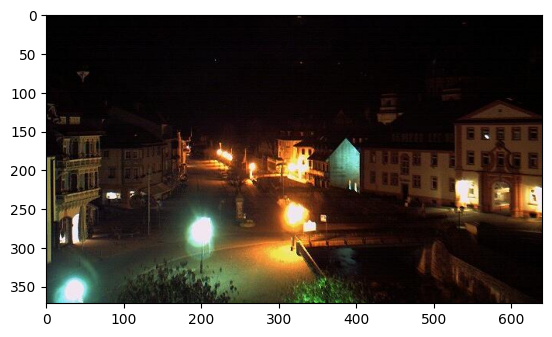

In [10]:
random_img_viz(train_img)

### Langkah 3 - Pra Pengolahan Data

In [11]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

- cv2.resize(image, (1100, 600)): Fungsi OpenCV untuk mengubah ukuran gambar menjadi 1100x600 piksel.
- std_img: Gambar hasil resize yang kemudian dikembalikan oleh fungsi.

In [12]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

- num_val: Variabel yang menyimpan nilai numerik hasil encoding.
- if(label == 'day'):: Memeriksa jika label adalah 'day'.
  - Jika benar, num_val diatur menjadi 1.
  - Jika tidak, num_val tetap 0.
- return num_val: Mengembalikan nilai numerik yang sesuai dengan label input.

In [13]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

- std_img_list: Daftar kosong untuk menyimpan gambar yang sudah diproses dan labelnya.
- for item in img_list:: Iterasi setiap item dalam img_list.
  - image = item[0]: Mengambil gambar dari tuple.
  - label = item[1]: Mengambil label dari tuple.
  - std_img = standarized_input(image): Memanggil fungsi standarized_input untuk mengubah ukuran gambar.
  - img_label = label_encoder(label): Memanggil fungsi label_encoder untuk mengubah label menjadi nilai numerik.
  - std_img_list.append((std_img, img_label)): Menambahkan gambar yang sudah diproses dan labelnya ke std_img_list.
- return std_img_list: Mengembalikan daftar yang berisi gambar yang telah diproses dan label numeriknya.

In [14]:
train_std_img_list = preprocess(train_img)

Menjalankan fungsi preprocess() dengan input train_img dan menyimpan hasilnya dalam variabel train_std_img_list.

In [15]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 41
(600, 1100, 3)


- pick_random = np.random.randint(0, len(train_std_img_list)): Memilih indeks secara acak dari train_std_img_list.
- print(train_std_img_list[pick_random][0].shape): Mencetak ukuran gambar pada indeks pick_random.

Shape	: (600, 1100, 3)
Label	: 0


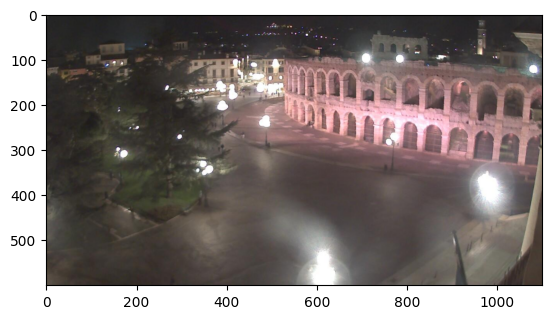

In [16]:
random_img_viz(train_std_img_list)

 kode ini akan menampilkan gambar acak dari daftar train_std_img_list dan mencetak informasi mengenai bentuk (shape) dan label gambar tersebut.

### Langkah 4 - Ekstraksi Fitur

In [17]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

- img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV): Gambar yang dimasukkan dikonversi dari ruang warna RGB ke HSV.
- sum_brightness = np.sum(img_hsv[:,:,2]): Menghitung jumlah total nilai kecerahan (Value) dari channel ketiga di HSV
- area = image.shape[0] * image.shape[1]: Menghitung luas gambar berdasarkan jumlah pikselnya
- avg = sum_brightness / area: Menghitung rata-rata kecerahan

Image 19
Avg Brighness: 26.9463


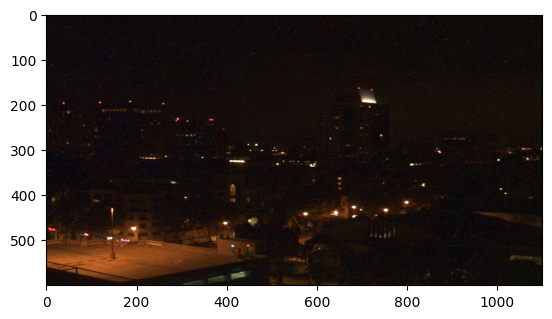

In [18]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

- rand_img = np.random.randint(0, len(train_std_img_list)): Mengambil gambar secara acak dari daftar gambar yang sudah distandardisasi.
- feature_img = train_std_img_list[rand_img][0]: Mengambil gambar acak berdasarkan indeks acak yang dipilih sebelumnya, tanpa labelnya.
- avg_img = avg_brightness(feature_img): Menghitung rata-rata kecerahan gambar yang dipilih

### Langkah 5 - Klasifikasi dengan Metode Threshold

In [19]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

- avg = avg_brightness(img): Menghitung rata-rata kecerahan gambar dengan memanggil fungsi avg_brightness()
- pred = 0: Inisialisasi label prediksi sebagai 0 (diasumsikan sebagai night).
- if avg > threshold:: Memeriksa apakah rata-rata kecerahan gambar lebih besar dari nilai ambang (threshold) yang ditentukan.
- pred = 1: Jika kecerahan rata-rata lebih besar dari threshold, label prediksi diubah menjadi 1 (diasumsikan sebagai day).
- return pred: Mengembalikan label prediksi, di mana 1 berarti "day" dan 0 berarti "night".

Image 34
Actual label: 0
Predicted label: 0


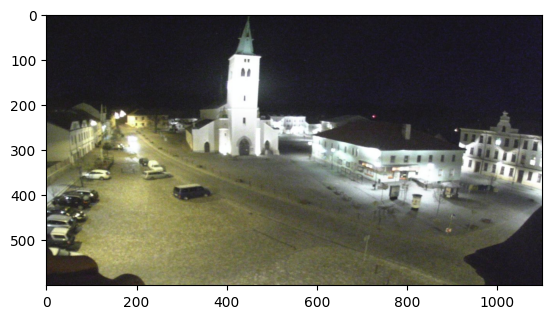

In [20]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

- rand_img = np.random.randint(0, len(train_std_img_list)): Memilih secara acak indeks gambar dari daftar gambar yang telah diproses
- pred = predict_label(train_std_img_list[rand_img][0], threshold=120): Memanggil fungsi predict_label() untuk memprediksi label gambar yang dipilih secara acak.n_std_img_list)): Memilih secara acak indeks gambar dari daftar gambar yang telah diproses

### Langkah 6 - Evaluasi (Manual)

In [21]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

- miss_labels = []: Membuat list kosong untuk menyimpan gambar yang salah prediksi.
- Loop melalui semua gambar dalam img_list: Untuk setiap gambar, mengambil img (gambar) dan label (label sebenarnya).
- pred_label = predict_label(img, threshold): Memanggil fungsi predict_label() untuk memprediksi label gambar berdasarkan nilai ambang batas (threshold) yang ditentukan.
- if pred_label != label:: Jika label prediksi berbeda dengan label asli, gambar, label prediksi, dan label asli akan disimpan ke dalam miss_labels.
- Menghitung akurasi:
  - total_img menghitung total jumlah gambar.
  - corr_pred menghitung jumlah prediksi yang benar.
  - Akurasi dihitung dengan membagi corr_pred dengan total_img.

In [22]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Kode evaluate(train_std_img_list, threshold=120) akan mengevaluasi kinerja model pada data training dengan threshold 120.

In [23]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


- test_img = load_dataset(test_dir): Memuat gambar dari direktori data uji.
- test_std_img_list = preprocess(test_img): Melakukan preprocessing pada data uji dengan menstandarkan ukuran gambar dan mengonversi label ke bentuk numerik.
- evaluate(test_std_img_list, threshold=120): Mengevaluasi akurasi model pada data uji menggunakan threshold 120.

## Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

### Langkah 4 Alternatif - Membuat Feature Vectors

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

- Input: img_list – daftar berisi gambar dan label-nya.
- Inisialisasi: avg_list dan labels sebagai list kosong untuk menyimpan fitur rata-rata kecerahan dan label gambar.
- Loop: Untuk setiap gambar dalam img_list:
  - Ekstraksi Fitur: Hitung rata-rata kecerahan gambar menggunakan avg_brightness.
  - Simpan: Tambahkan hasil kecerahan dan label gambar ke dalam avg_list dan labels.
- DataFrame: Gabungkan avg_list dan labels menjadi satu array kolumnar dengan np.column_stack.
- Buat DataFrame dari array ini dengan kolom 'AVG_BRIGHT' dan 'LABELS'.
- Output: DataFrame yang berisi dua kolom: rata-rata kecerahan (AVG_BRIGHT) dan label gambar (LABELS).


In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,99.244502,0.0
1,99.397864,0.0
2,113.241642,0.0
3,90.655914,0.0
4,102.748306,0.0


- train_avg_img: DataFrame yang dihasilkan berisi dua kolom, AVG_BRIGHT (rata-rata kecerahan gambar) dan LABELS (label gambar).
- print(f'Shape: {train_avg_img.shape}'): Menampilkan ukuran DataFrame
- train_avg_img.head(): Menampilkan lima baris pertama dari DataFrame

In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,111.826289,0.0
1,116.502630,0.0
2,13.765597,0.0
3,20.858229,0.0
4,89.018533,0.0


- Menggunakan fungsi extract_avg_bright_feature, Anda mengubah data pengujian menjadi DataFrame
- print(f'Shape: {test_avg_img.shape}'): Menampilkan ukuran DataFrame
- test_avg_img.head(): Menampilkan lima baris pertama dari DataFrame

### Langkah 5 Alternatif

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

- X_train dan X_test: Menyiapkan fitur dari data pelatihan dan pengujian. Di sini, fitur adalah rata-rata kecerahan gambar. Menggunakan .values.reshape(-1,1) untuk memastikan data dalam format yang benar (vektor kolom).
- y_train dan y_test: Label target dari data pelatihan dan pengujian.
- model = SVC(): Membuat objek SVC dengan parameter default.
- model.fit(X_train, y_train): Melatih model menggunakan data pelatihan (X_train dan y_train).

### Langkah 6 Alternatif

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


- from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari pustaka sklearn untuk menghitung akurasi model.
- y_train_pred = model.predict(X_train): Menggunakan model untuk membuat prediksi pada data pelatihan (X_train).
- acc_train = accuracy_score(y_train, y_train_pred): Menghitung akurasi model pada data pelatihan dengan membandingkan prediksi (y_train_pred) dengan label sebenarnya (y_train).
- y_test_pred = model.predict(X_test): Menggunakan model untuk membuat prediksi pada data pengujian (X_test).
- acc_test = accuracy_score(y_test, y_test_pred): Menghitung akurasi model pada data pengujian dengan membandingkan prediksi (y_test_pred) dengan label sebenarnya (y_test).

# TUGAS 1

## 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

1. Membaca dan memproses data voice.csv.
2. Memisahkan fitur (X) dan target (y).
3. Mengubah label menjadi numerik (0 untuk 'male' dan 1 untuk 'female').
4. Membagi data menjadi set pelatihan dan pengujian.
5. Melatih model SVM dengan kernel linear.
6. Memprediksi data uji.
7. Mengevaluasi performa model menggunakan akurasi dan laporan klasifikasi.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Membaca data voice.csv
voice_data = pd.read_csv('voice.csv')

# Memisahkan fitur dan target
X_voice = voice_data.drop(columns=['label'])
y_voice = voice_data['label']

# Mengubah label menjadi numerik (laki-laki = 0, perempuan = 1)
y_voice = y_voice.map({'male': 0, 'female': 1})

# Membagi data menjadi set pelatihan dan pengujian
X_train_voice, X_test_voice, y_train_voice, y_test_voice = train_test_split(X_voice, y_voice, test_size=0.3, random_state=42)

# Melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_voice, y_train_voice)

# Memprediksi data uji
y_pred_voice = svm_model.predict(X_test_voice)

# Evaluasi model
svm_accuracy = accuracy_score(y_test_voice, y_pred_voice)
svm_report = classification_report(y_test_voice, y_pred_voice, target_names=['male', 'female'])

print(f"Akurasi Model SVM: {svm_accuracy}")
print("Laporan Klasifikasi SVM:\n", svm_report)


Akurasi Model SVM: 0.9263932702418507
Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

        male       0.89      0.98      0.93       499
      female       0.98      0.86      0.92       452

    accuracy                           0.93       951
   macro avg       0.93      0.92      0.93       951
weighted avg       0.93      0.93      0.93       951



## 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

- Menggunakan data spam.csv

- Fitur CountVectorizer dengan mengaktifkan stop_words

- Evaluasi hasilnya

1. Membaca dan memproses data spam.csv.
2. Mengubah label menjadi numerik (0 untuk 'ham' dan 1 untuk 'spam').
3. Membagi data menjadi set pelatihan dan pengujian.
4. Membuat pipeline dengan CountVectorizer (mengaktifkan stop_words) dan MultinomialNB.
5. Melatih model.
6. Memprediksi data uji.
7. Mengevaluasi performa model menggunakan akurasi dan laporan klasifikasi.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Membaca data spam.csv
spam_data = pd.read_csv('spam.csv', encoding='latin-1')
spam_data = spam_data.rename(columns={'v1': 'label', 'v2': 'text'})
spam_data = spam_data[['label', 'text']]

# Mengubah label menjadi numerik (spam = 1, ham = 0)
spam_data['label'] = spam_data['label'].map({'spam': 1, 'ham': 0})

# Membagi data menjadi set pelatihan dan pengujian
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(spam_data['text'], spam_data['label'], test_size=0.3, random_state=42)

# Membuat pipeline CountVectorizer dan MultinomialNB
count_vect_nb_pipeline = make_pipeline(CountVectorizer(stop_words='english'), MultinomialNB())

# Melatih model
count_vect_nb_pipeline.fit(X_train_spam, y_train_spam)

# Memprediksi data uji
y_pred_spam_count = count_vect_nb_pipeline.predict(X_test_spam)

# Evaluasi model
count_nb_accuracy = accuracy_score(y_test_spam, y_pred_spam_count)
count_nb_report = classification_report(y_test_spam, y_pred_spam_count, target_names=['ham', 'spam'])

print(f"Akurasi Model Multinomial Naive Bayes dengan CountVectorizer: {count_nb_accuracy}")
print("Laporan Klasifikasi:\n", count_nb_report)


Akurasi Model Multinomial Naive Bayes dengan CountVectorizer: 0.9832535885167464
Laporan Klasifikasi:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1453
        spam       0.95      0.92      0.94       219

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



## 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

- Menggunakan data spam.csv

- Fitur TF-IDF dengan mengaktifkan stop_words

- Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

- Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

1. Membaca dan memproses data spam.csv.
2. Mengubah label menjadi numerik (0 untuk 'ham' dan 1 untuk 'spam').
3. Membagi data menjadi set pelatihan dan pengujian.
4. Membuat pipeline dengan TF-IDF (mengaktifkan stop_words) dan MultinomialNB.
5. Melatih model.
6. Memprediksi data uji.
7. Mengevaluasi performa model dan membandingkan dengan hasil pada tugas no 2.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat pipeline TF-IDF dan MultinomialNB
tfidf_nb_pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())

# Melatih model
tfidf_nb_pipeline.fit(X_train_spam, y_train_spam)

# Memprediksi data uji
y_pred_spam_tfidf = tfidf_nb_pipeline.predict(X_test_spam)

# Evaluasi model
tfidf_nb_accuracy = accuracy_score(y_test_spam, y_pred_spam_tfidf)
tfidf_nb_report = classification_report(y_test_spam, y_pred_spam_tfidf, target_names=['ham', 'spam'])

print(f"Akurasi Model Multinomial Naive Bayes dengan TF-IDF: {tfidf_nb_accuracy}")
print("Laporan Klasifikasi:\n", tfidf_nb_report)


Akurasi Model Multinomial Naive Bayes dengan TF-IDF: 0.9677033492822966
Laporan Klasifikasi:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



### Perbandingan dengan Hasil Tugas No 2
- Model dengan CountVectorizer memiliki akurasi lebih tinggi (98.33%) dibandingkan dengan model menggunakan TF-IDF (96.77%).
- Precision dan Recall untuk kategori "spam" lebih tinggi pada model CountVectorizer, menunjukkan bahwa model ini lebih efektif dalam mendeteksi pesan spam.

### Kesimpulan
Untuk kasus data spam.csv, fitur CountVectorizer memberikan performa yang lebih baik daripada TF-IDF saat digunakan bersama dengan model Multinomial Naive Bayes.

# TUGAS 2

## Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [24]:
# Function to extract histogram features from image
def extract_histogram_features(image, bins=32):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate histogram for H, S, and V channels
    hist_h = cv2.calcHist([img_hsv], [0], None, [bins], [0, 256])
    hist_s = cv2.calcHist([img_hsv], [1], None, [bins], [0, 256])
    hist_v = cv2.calcHist([img_hsv], [2], None, [bins], [0, 256])

    # Normalize histograms
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()

    # Concatenate histograms into a single feature vector
    hist_features = np.hstack([hist_h, hist_s, hist_v])

    return hist_features

# Function to extract histogram features from image list and store in pandas DataFrame
def extract_histogram_data(img_list, bins=32):
    histograms = []
    labels = []

    for img, label in img_list:
        hist_features = extract_histogram_features(img, bins)
        histograms.append(hist_features)
        labels.append(label)

    # Stack features into a dataframe
    hist_data = np.column_stack(histograms)
    df = pd.DataFrame(hist_data).T # Transpose to match dimension

    # Add labels
    df['LABELS'] = labels

    return df

# Extract histogram features for train data
train_hist_img = extract_histogram_data(train_std_img_list)

# Extract histogram features for test data
test_hist_img = extract_histogram_data(test_std_img_list)

# Split data and label for train and test data
X_train_hist = train_hist_img.iloc[:, :-1].values
y_train_hist = train_hist_img.iloc[:, -1].values
X_test_hist = test_hist_img.iloc[:, :-1].values
y_test_hist = test_hist_img.iloc[:, -1].values

# Import SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train SVM model
model_hist = SVC()
model_hist.fit(X_train_hist, y_train_hist)

# Make prediction on train data
y_train_hist_pred = model_hist.predict(X_train_hist)

# Evaluate model accuracy on train data
acc_train_hist = accuracy_score(y_train_hist, y_train_hist_pred)

# Make prediction on test data
y_test_hist_pred = model_hist.predict(X_test_hist)

# Evaluate model accuracy on test data
acc_test_hist = accuracy_score(y_test_hist, y_test_hist_pred)

# Print the evaluation results
print(f'Accuracy on train data with histogram features: {acc_train_hist:.4f}')
print(f'Accuracy on test data with histogram features: {acc_test_hist:.4f}')


Accuracy on train data with histogram features: 1.0000
Accuracy on test data with histogram features: 0.9938
